In [ ]:
!pip install -U paddlenlp



     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.9/2.9 MB 9.2 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 43.6/43.6 kB 4.3 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 86.9/86.9 kB 8.1 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 128.7/128.7 kB 11.7 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 547.8/547.8 kB 14.2 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 101.0/101.0 kB 10.3 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 15.9/15.9 MB 48.5 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 3.8/3.8 MB 24.1 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 6.3/6.3 MB 74.5 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 92.0/92.0 kB 5.5 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 62.4/62.4 kB 5.3 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 107.6/107.6 kB 9.4 MB/s eta

In [ ]:
# 基本数据包：pandas和numpy
import pandas as pd
import numpy as np
# 可视化包
import matplotlib.pyplot as plt
from matplotlib import rcParams
import seaborn as sns
%matplotlib inline
plt.rcParams['figure.figsize'] = [10, 5]

# 导入Paddle库
import os
import paddle
import paddle.nn.functional as F


In [ ]:
from google.colab import drive
drive.mount('/content/gdrive')
#to create an instance name of My Drive
!ln -s /content/gdrive/My\ Drive/ /mydrive
!ls /mydrive/

Mounted at /content/gdrive
ln: failed to create symbolic link '/mydrive/My Drive': File exists
 build.ipynb   Fake.csv       'My Drive'   SMSSpamCollection   True.csv		 Untitled1.ipynb
 data.csv      HamSpam.ipynb   news	   test.ipynb	       Untitled0.ipynb	 weather.ipynb


In [ ]:
import pandas as pd
# 读取数据集
fake_news = pd.read_csv('/mydrive/Fake.csv')
true_news = pd.read_csv('/mydrive/True.csv')
# 虚假新闻数据集的大小以及字段
print ("虚假新闻数据集的大小以及字段 (row, column):"+ str(fake_news.shape))
print (fake_news.info())
print("\n --------------------------------------- \n")
# 真实新闻数据集的大小以及字段
print ("真实新闻数据集的大小以及字段 (row, column):"+ str(true_news.shape))
print (true_news.info())


虚假新闻数据集的大小以及字段 (row, column):(23481, 4)
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 23481 entries, 0 to 23480
Data columns (total 4 columns):
 #   Column   Non-Null Count  Dtype 
---  ------   --------------  ----- 
 0   title    23481 non-null  object
 1   text     23481 non-null  object
 2   subject  23481 non-null  object
 3   date     23481 non-null  object
dtypes: object(4)
memory usage: 733.9+ KB
None

 --------------------------------------- 

真实新闻数据集的大小以及字段 (row, column):(21417, 4)
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21417 entries, 0 to 21416
Data columns (total 4 columns):
 #   Column   Non-Null Count  Dtype 
---  ------   --------------  ----- 
 0   title    21417 non-null  object
 1   text     21417 non-null  object
 2   subject  21417 non-null  object
 3   date     21417 non-null  object
dtypes: object(4)
memory usage: 669.4+ KB
None


In [ ]:
fake_news.head(5)


,title,text,subject,date
0,Donald Trump Sends Out Embarrassing New Year’...,Donald Trump just couldn t wish all Americans ...,News,"December 31, 2017"
1,Drunk Bragging Trump Staffer Started Russian ...,House Intelligence Committee Chairman Devin Nu...,News,"December 31, 2017"
2,Sheriff David Clarke Becomes An Internet Joke...,"On Friday, it was revealed that former Milwauk...",News,"December 30, 2017"
3,Trump Is So Obsessed He Even Has Obama’s Name...,"On Christmas day, Donald Trump announced that ...",News,"December 29, 2017"
4,Pope Francis Just Called Out Donald Trump Dur...,Pope Francis used his annual Christmas Day mes...,News,"December 25, 2017"


In [ ]:
true_news.head(5)


,title,text,subject,date
0,"As U.S. budget fight looms, Republicans flip t...",WASHINGTON (Reuters) - The head of a conservat...,politicsNews,"December 31, 2017"
1,U.S. military to accept transgender recruits o...,WASHINGTON (Reuters) - Transgender people will...,politicsNews,"December 29, 2017"
2,Senior U.S. Republican senator: 'Let Mr. Muell...,WASHINGTON (Reuters) - The special counsel inv...,politicsNews,"December 31, 2017"
3,FBI Russia probe helped by Australian diplomat...,WASHINGTON (Reuters) - Trump campaign adviser ...,politicsNews,"December 30, 2017"
4,Trump wants Postal Service to charge 'much mor...,SEATTLE/WASHINGTON (Reuters) - President Donal...,politicsNews,"December 29, 2017"


In [ ]:
#假新闻的目标变量
fake_news['output']=0
#真新闻的目标变量
true_news['output']=1


In [ ]:
#合并title与text合并为news
fake_news['news']=fake_news['title']+fake_news['text']
fake_news=fake_news.drop(['title', 'text'], axis=1)
#合并title与text合并为news
true_news['news']=true_news['title']+true_news['text']
true_news=true_news.drop(['title', 'text'], axis=1)
# 重构表格
fake_news = fake_news[['subject', 'date', 'news','output']]
true_news = true_news[['subject', 'date', 'news','output']]


KeyError: 'title'

In [ ]:
fake_news['date'].value_counts()


date
May 10, 2017         46
May 26, 2016         44
May 6, 2016          44
May 5, 2016          44
May 11, 2016         43
                     ..
December 9, 2017      1
December 4, 2017      1
November 19, 2017     1
November 20, 2017     1
Jul 19, 2015          1
Name: count, Length: 1681, dtype: int64

In [ ]:
# 删除含有链接以及Host的数据
fake_news=fake_news[~fake_news.date.str.contains("http")]
fake_news=fake_news[~fake_news.date.str.contains("HOST")]
# '''等效'''
#fake_news=fake_news[fake_news.date.str.contains("Jan|Feb|Mar|Apr|May|Jun|Jul|Aug|Sep|Oct|Nov|Dec")]
# 只有假新闻数据集的日期列存在问题。现在，我们将日期列转换为日期时间格式


In [ ]:
frames = [fake_news, true_news]
news_dataset = pd.concat(frames)
news_dataset


,subject,date,news,output
0,News,"December 31, 2017",Donald Trump Sends Out Embarrassing New Year’...,0
1,News,"December 31, 2017",Drunk Bragging Trump Staffer Started Russian ...,0
2,News,"December 30, 2017",Sheriff David Clarke Becomes An Internet Joke...,0
3,News,"December 29, 2017",Trump Is So Obsessed He Even Has Obama’s Name...,0
4,News,"December 25, 2017",Pope Francis Just Called Out Donald Trump Dur...,0
...,...,...,...,...
21412,worldnews,"August 22, 2017",'Fully committed' NATO backs new U.S. approach...,1
21413,worldnews,"August 22, 2017",LexisNexis withdrew two products from Chinese ...,1
21414,worldnews,"August 22, 2017",Minsk cultural hub becomes haven from authorit...,1
21415,worldnews,"August 22, 2017",Vatican upbeat on possibility of Pope Francis ...,1


In [ ]:
import re
import string

clean_news=news_dataset.copy()
def review_cleaning(text):
    '''Make text lowercase, remove text in square brackets,remove links,remove punctuation
    and remove words containing numbers.'''
    text = str(text).lower()
    text = re.sub('\[.*?\]', '', text)
    text = re.sub('https?://\S+|www\.\S+', '', text)
    text = re.sub('<.*?>+', '', text)
    text = re.sub('[%s]' % re.escape(string.punctuation), '', text)
    text = re.sub('\n', '', text)
    text = re.sub('\w*\d\w*', '', text)
    return text
clean_news['news']=clean_news['news'].apply(lambda x:review_cleaning(x))
clean_news.head()


,subject,date,news,output
0,News,"December 31, 2017",donald trump sends out embarrassing new year’...,0
1,News,"December 31, 2017",drunk bragging trump staffer started russian ...,0
2,News,"December 30, 2017",sheriff david clarke becomes an internet joke...,0
3,News,"December 29, 2017",trump is so obsessed he even has obama’s name...,0
4,News,"December 25, 2017",pope francis just called out donald trump dur...,0


In [ ]:
import nltk
nltk.download('stopwords')
from nltk.corpus import stopwords

stop = stopwords.words('english')
clean_news['news'] = clean_news['news'].apply(lambda x: ' '.join([word for word in x.split() if word not in (stop)]))
clean_news.head()


[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


,subject,date,news,output
0,News,"December 31, 2017",donald trump sends embarrassing new year’s eve...,0
1,News,"December 31, 2017",drunk bragging trump staffer started russian c...,0
2,News,"December 30, 2017",sheriff david clarke becomes internet joke thr...,0
3,News,"December 29, 2017",trump obsessed even obama’s name coded website...,0
4,News,"December 25, 2017",pope francis called donald trump christmas spe...,0


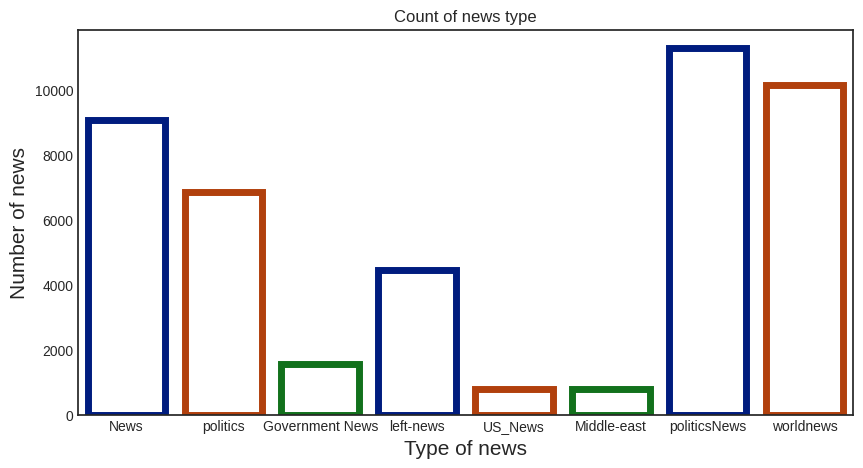

In [ ]:
ax = sns.countplot(x="subject", data=clean_news,
                   facecolor=(0, 0, 0, 0),
                   linewidth=5,
                   edgecolor=sns.color_palette("dark", 3))
# 设置label与字体大小
ax.set(xlabel='Type of news', ylabel='Number of news',title='Count of news type')
ax.xaxis.get_label().set_fontsize(15)
ax.yaxis.get_label().set_fontsize(15)


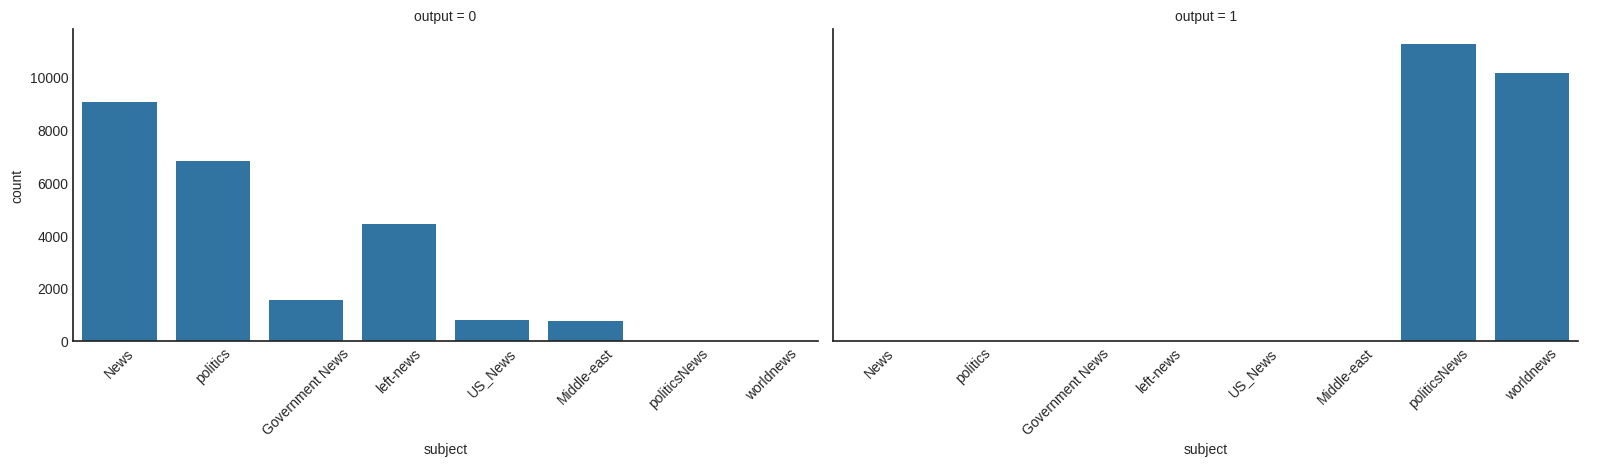

In [ ]:
g = sns.catplot(x="subject", col="output",
                data=clean_news, kind="count",
                height=4, aspect=2)
# 旋转x轴
g.set_xticklabels(rotation=45)


In [ ]:
!pip install textblob
!pip install iplot
!pip install plotly
!pip install cufflinks


ERROR: Could not find a version that satisfies the requirement iplot (from versions: none)
ERROR: No matching distribution found for iplot


<ipython-input-135-1f2fe405dc35>:9: MatplotlibDeprecationWarning:

The seaborn styles shipped by Matplotlib are deprecated since 3.6, as they no longer correspond to the styles shipped by seaborn. However, they will remain available as 'seaborn-v0_8-<style>'. Alternatively, directly use the seaborn API instead.

<ipython-input-135-1f2fe405dc35>:11: UserWarning:



`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751


<ipython-input-135-1f2fe405dc35>:14: UserWarning:



`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level functio

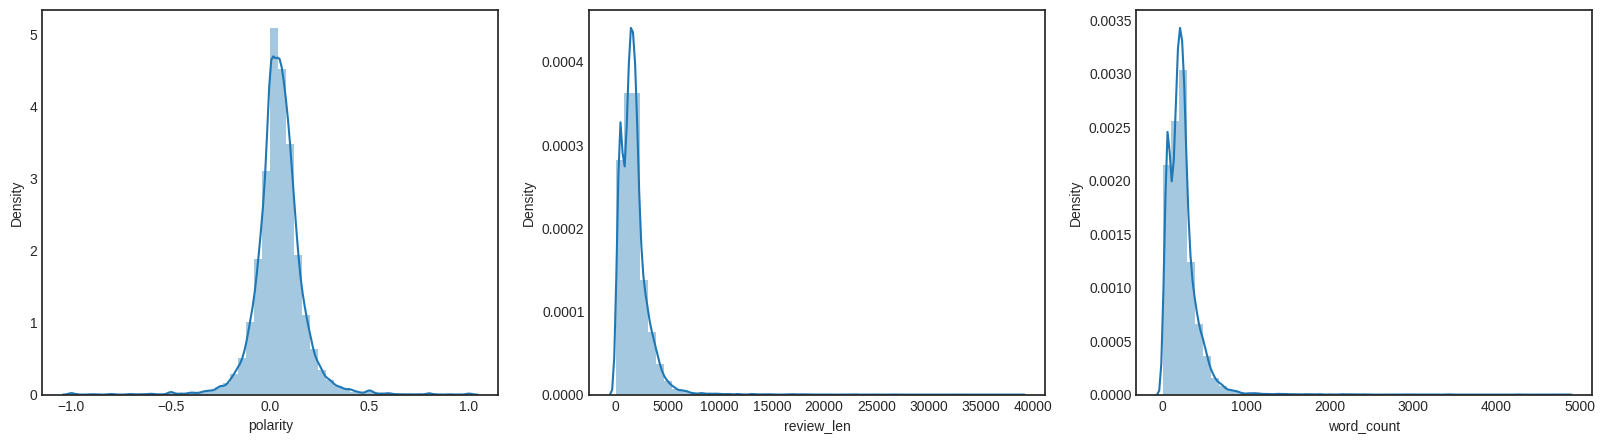

In [ ]:
from textblob import TextBlob

# 从新闻中提取新特征
clean_news['polarity'] = clean_news['news'].map(lambda text: TextBlob(text).sentiment.polarity)
clean_news['review_len'] = clean_news['news'].astype(str).apply(len)
clean_news['word_count'] = clean_news['news'].apply(lambda x: len(str(x).split()))
# 新特征分布
plt.figure(figsize = (20, 5))
plt.style.use('seaborn-white')
plt.subplot(131)
sns.distplot(clean_news['polarity'])
fig = plt.gcf()
plt.subplot(132)
sns.distplot(clean_news['review_len'])
fig = plt.gcf()
plt.subplot(133)
sns.distplot(clean_news['word_count'])
fig = plt.gcf()


In [ ]:
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.feature_extraction.text import CountVectorizer
from plotly import tools
import plotly.graph_objs as go
from plotly.offline import iplot
# 获取topn的词
def get_top_n_words(corpus, n=None):
    vec = CountVectorizer().fit(corpus)
    bag_of_words = vec.transform(corpus)
    sum_words = bag_of_words.sum(axis=0)
    words_freq = [(word, sum_words[0, idx]) for word, idx in vec.vocabulary_.items()]
    words_freq =sorted(words_freq, key = lambda x: x[1], reverse=True)
    return words_freq[:n]
# 获取top20常见的词
common_words = get_top_n_words(clean_news['news'], 20)
# 打印词频
for word, freq in common_words:
    print(word, freq)
# 创建词与词频的dataframe
import cufflinks as cf
cf.go_offline()
cf.set_config_file(offline=False, world_readable=True)

df1 = pd.DataFrame(common_words, columns = ['news' , 'count'])
df1.groupby('news').sum()['count'].sort_values(ascending=False).iplot(
    kind='bar', yTitle='Count', linecolor='black', title='Top 20 words in news')


trump 140400
said 130258
us 68081
would 55422
president 53189
people 41718
one 36146
state 33190
new 31799
also 31209
obama 29881
clinton 29003
house 28716
government 27392
donald 27376
reuters 27348
states 26331
republican 25287
could 24356
white 23823


In [ ]:
def get_top_n_bigram(corpus, n=None):
    vec = CountVectorizer(ngram_range=(2, 2)).fit(corpus)
    bag_of_words = vec.transform(corpus)
    sum_words = bag_of_words.sum(axis=0)
    words_freq = [(word, sum_words[0, idx]) for word, idx in vec.vocabulary_.items()]
    words_freq =sorted(words_freq, key = lambda x: x[1], reverse=True)
    return words_freq[:n]
common_words = get_top_n_bigram(clean_news['news'], 20)
for word, freq in common_words:
    print(word, freq)

df3 = pd.DataFrame(common_words, columns = ['news' , 'count'])
df3.groupby('news').sum()['count'].sort_values(ascending=False).iplot(
    kind='bar', yTitle='Count', linecolor='black', title='Top 20 bigrams in news')


donald trump 25059
united states 18394
white house 15485
hillary clinton 9502
new york 8110
north korea 7053
president donald 6928
image via 6188
barack obama 5603
trump said 4816
prime minister 4753
president trump 4646
supreme court 4595
last year 4560
last week 4512
said statement 4425
fox news 4074
president obama 4065
islamic state 4014
national security 3858


In [ ]:
!pip install  wordcloud


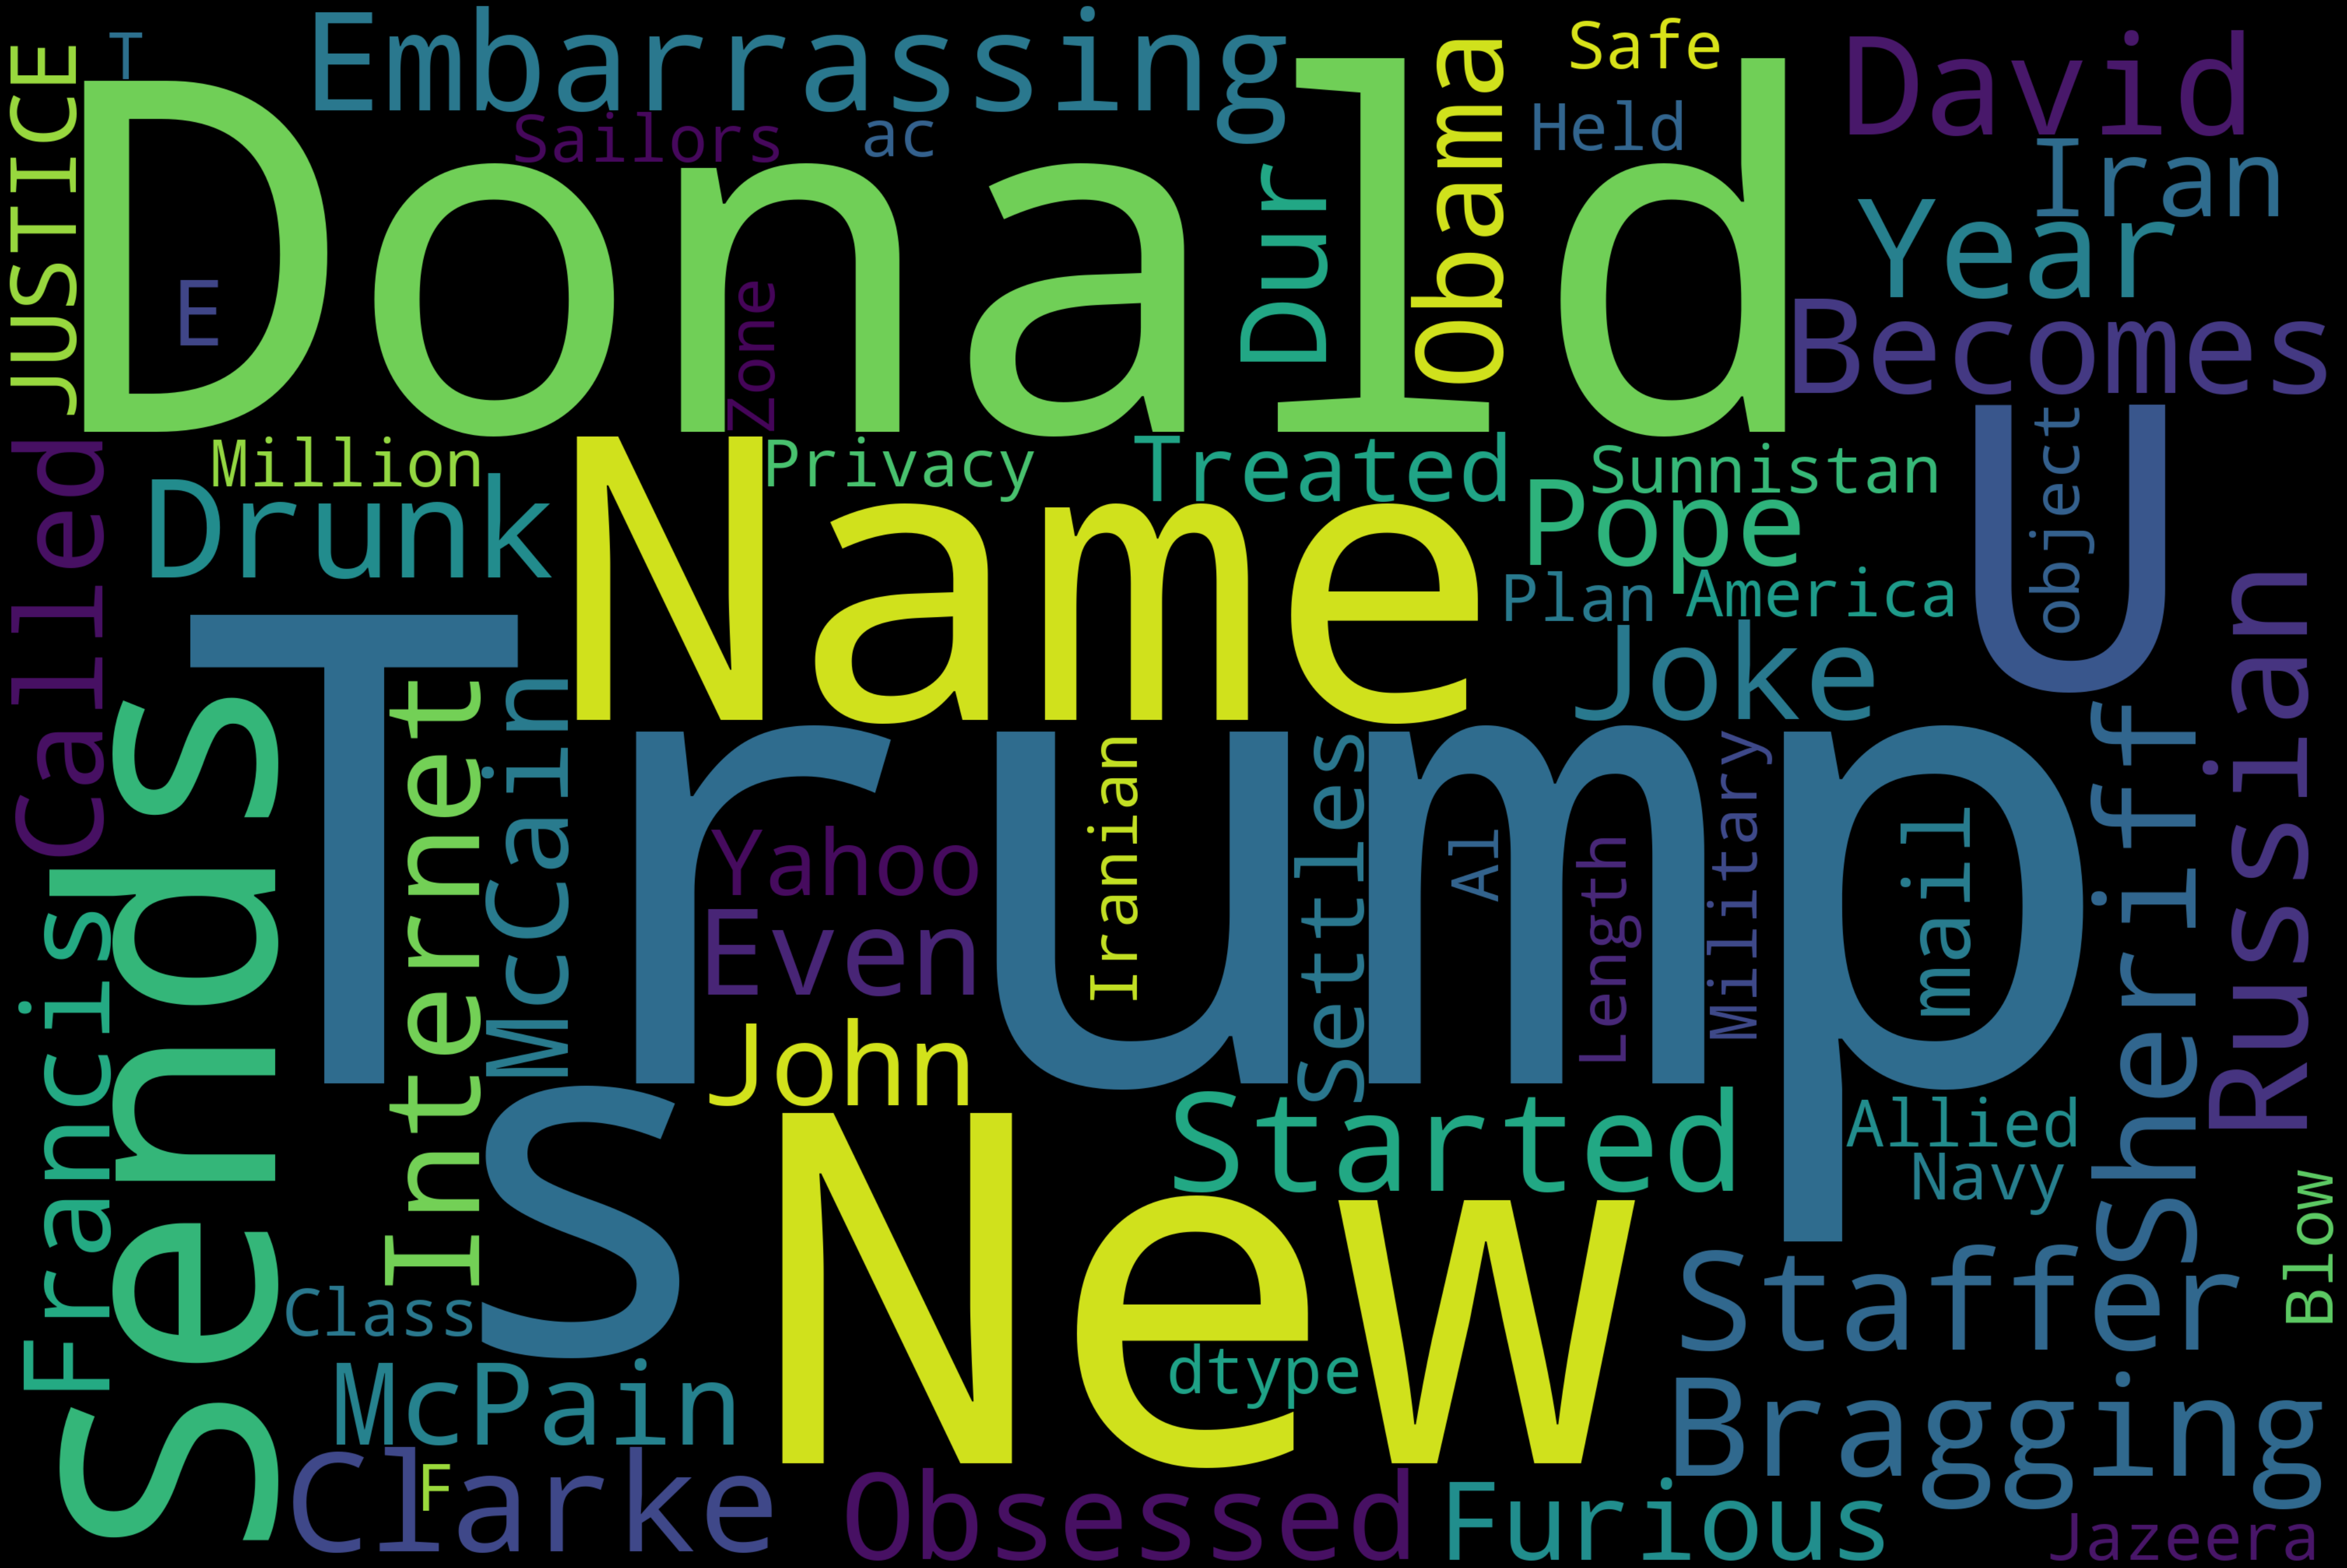

In [ ]:
from wordcloud import WordCloud,STOPWORDS

text = fake_news["news"]
wordcloud = WordCloud(
    width = 3000,
    height = 2000,
    background_color = 'black',
    stopwords = STOPWORDS).generate(str(text))
fig = plt.figure(
    figsize = (40, 30),
    facecolor = 'k',
    edgecolor = 'k')
plt.imshow(wordcloud, interpolation = 'bilinear')
plt.axis('off')
plt.tight_layout(pad=0)
plt.show()


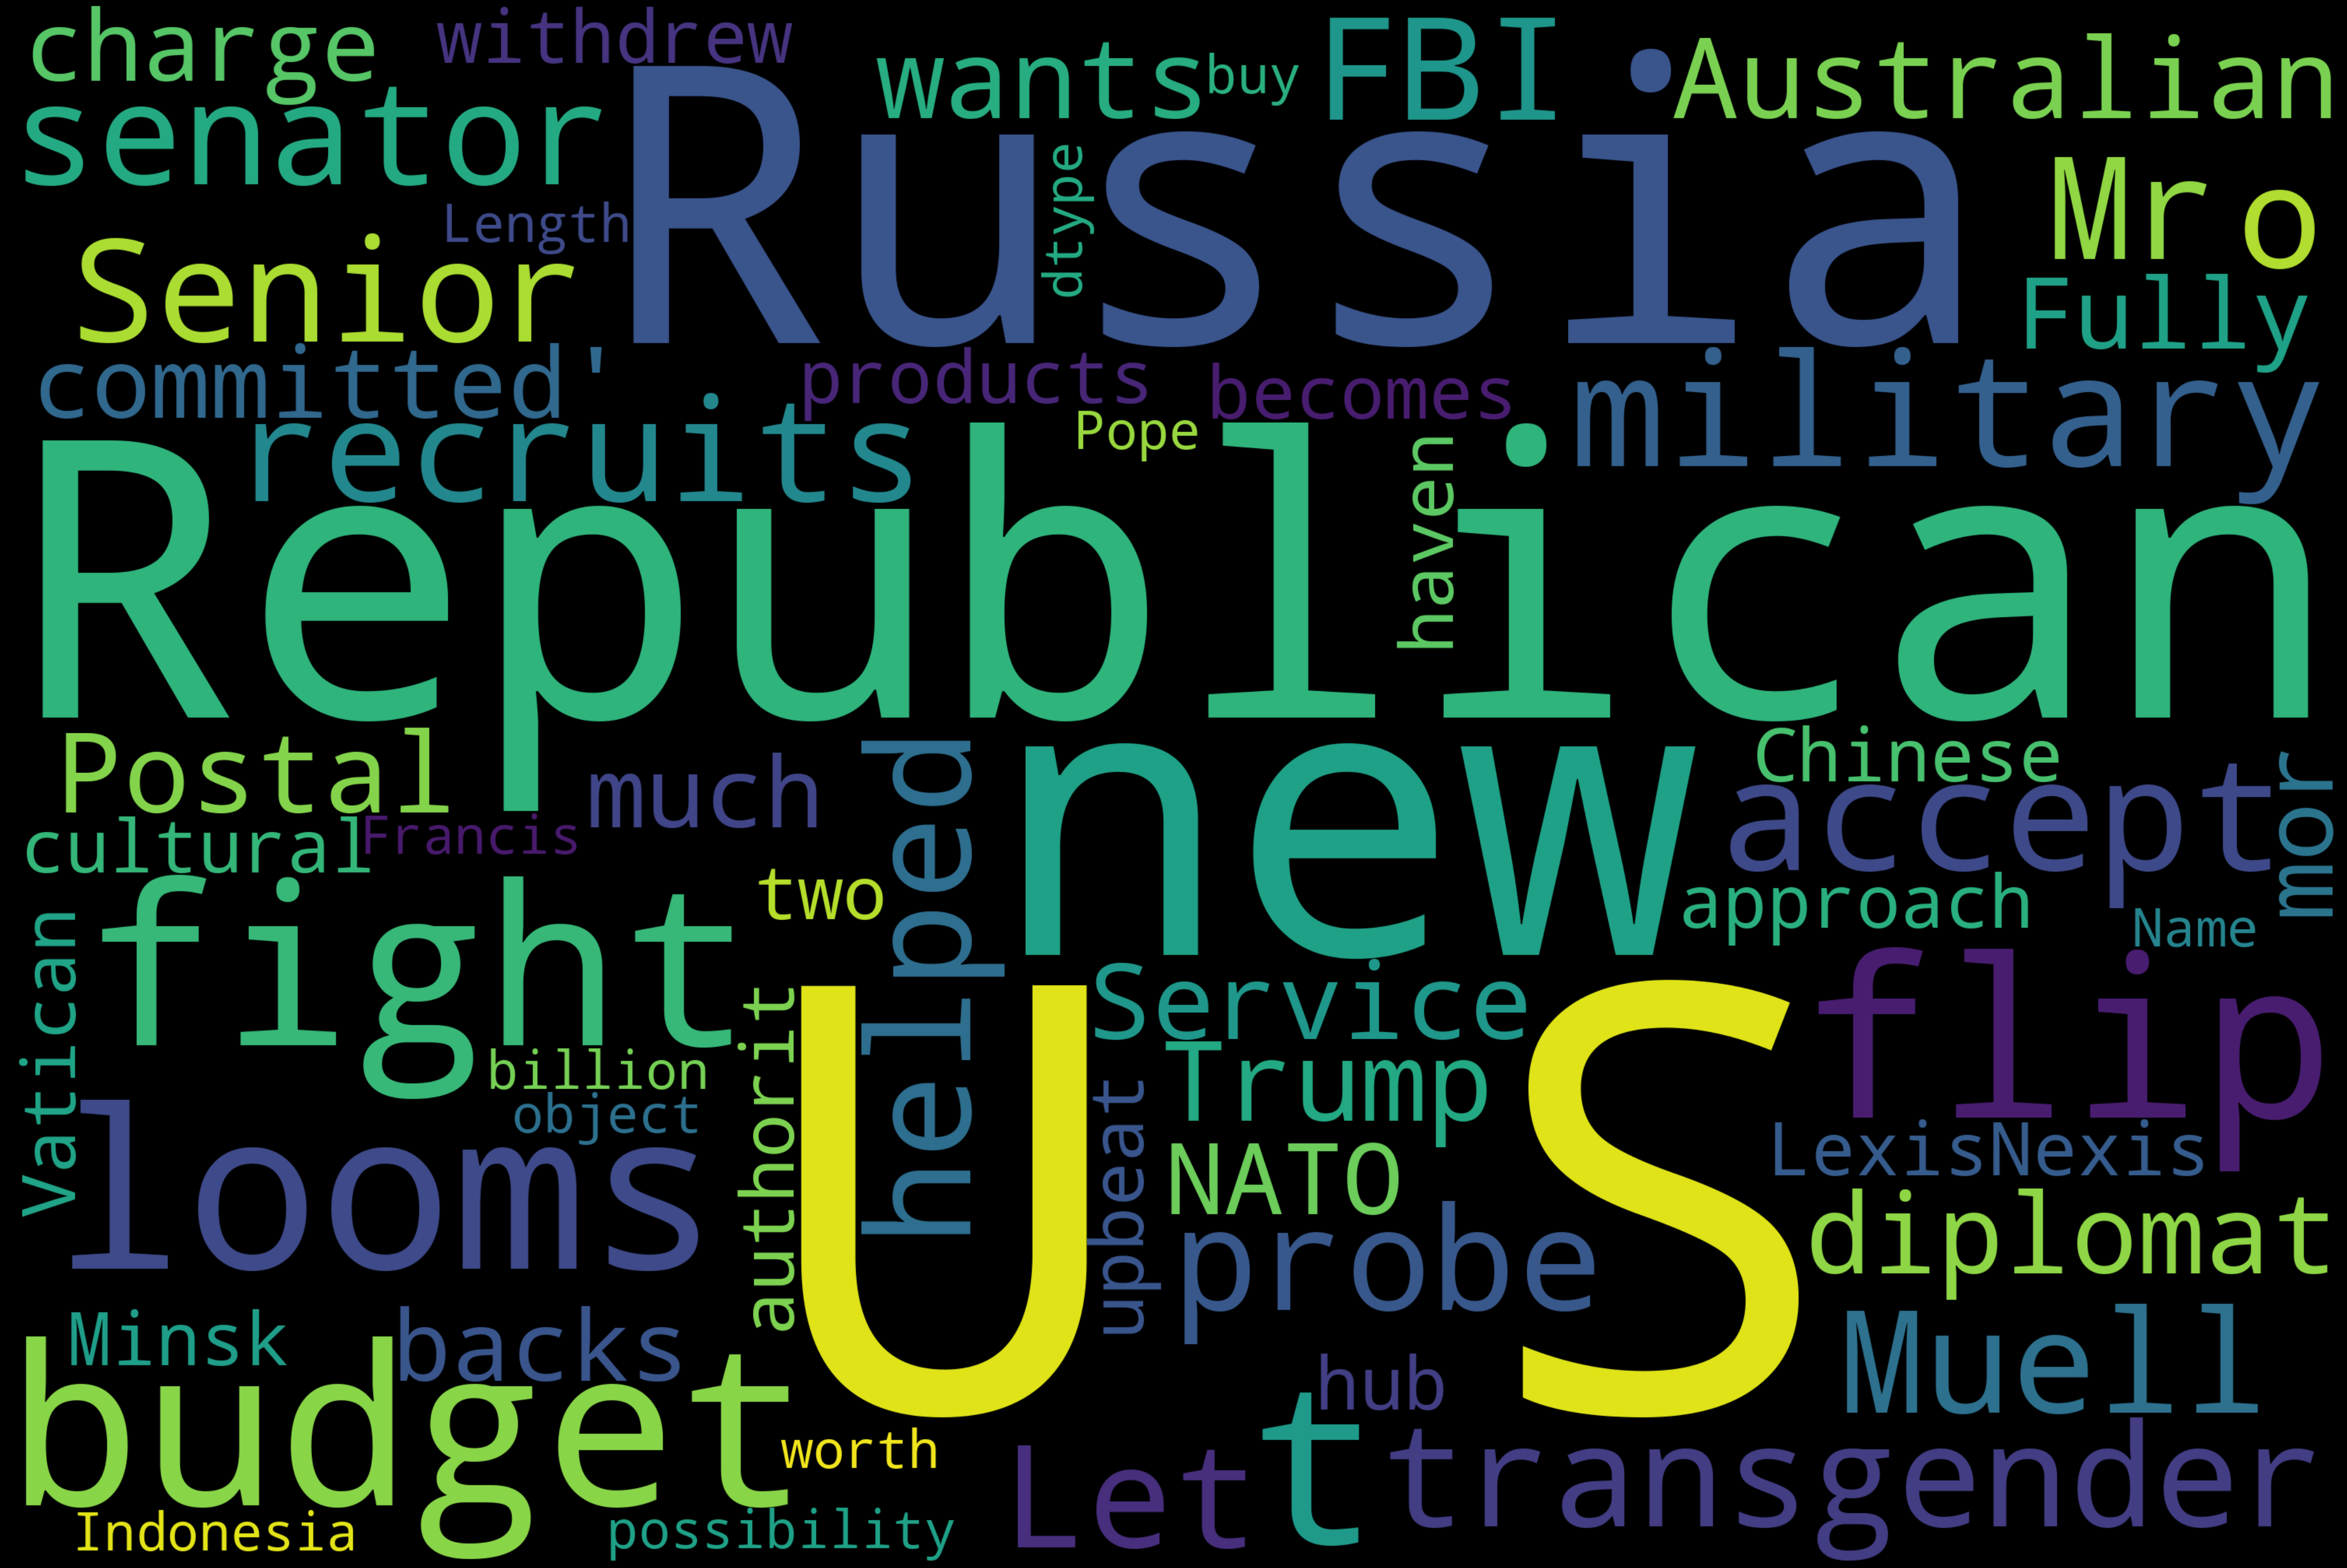

In [ ]:
from wordcloud import WordCloud, STOPWORDS
import matplotlib.pyplot as plt

# Assuming true_news is a dictionary with the key "news"
text = true_news["news"]

wordcloud = WordCloud(
    width=3000,
    height=2000,
    background_color='black',
    stopwords=STOPWORDS
).generate(str(text))

fig = plt.figure(
    figsize=(40, 30),
    facecolor='k',
    edgecolor='k'
)
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.tight_layout(pad=0)
plt.show()



In [ ]:
# 标签转换
true_news['label'] = 0
fake_news['label'] = 1

# 数据合并
news_all = pd.concat([true_news, fake_news], ignore_index=True)


In [ ]:
# 自定义reader方法
from paddlenlp.datasets import load_dataset
from paddle.io import Dataset, Subset
from paddlenlp.datasets import MapDataset

def read(pd_data):
    for index, item in pd_data.iterrows():
        yield {'text': item['title']+'. '+item['text'], 'label': item['label'], 'qid': index}


In [ ]:
from paddlenlp.transformers import SkepForSequenceClassification, SkepTokenizer

# 指定模型名称，一键加载模型
model = SkepForSequenceClassification.from_pretrained(pretrained_model_name_or_path="skep_ernie_2.0_large_en", num_classes=2)
# 同样地，通过指定模型名称一键加载对应的Tokenizer，用于处理文本数据，如切分token，转token_id等。
tokenizer = SkepTokenizer.from_pretrained(pretrained_model_name_or_path="skep_ernie_2.0_large_en")


[2024-06-25 13:39:52,400] [    INFO] - Loading weights file from cache at /root/.paddlenlp/models/skep_ernie_2.0_large_en/model_state.pdparams
[2024-06-25 13:40:04,071] [    INFO] - Loaded weights file from disk, setting weights to model.
[2024-06-25 13:40:33,891] [    INFO] - All model checkpoint weights were used when initializing SkepForSequenceClassification.

[2024-06-25 13:40:33,893] [ WARNING] - Some weights of SkepForSequenceClassification were not initialized from the model checkpoint at skep_ernie_2.0_large_en and are newly initialized: ['classifier.bias', 'classifier.weight']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.
[2024-06-25 13:40:33,940] [    INFO] - tokenizer config file saved in /root/.paddlenlp/models/skep_ernie_2.0_large_en/tokenizer_config.json
[2024-06-25 13:40:33,942] [    INFO] - Special tokens file saved in /root/.paddlenlp/models/skep_ernie_2.0_large_en/special_tokens_map.json


In [ ]:
# visualdl引入
from visualdl import LogWriter

writer = LogWriter("./log")


In [ ]:
import os
from functools import partial


import numpy as np
import paddle
import paddle.nn.functional as F
from paddlenlp.data import Stack, Tuple, Pad

from utils import create_dataloader

def convert_example(example,
                    tokenizer,
                    max_seq_length=512,
                    is_test=False):

    # 将原数据处理成model可读入的格式，enocded_inputs是一个dict，包含input_ids、token_type_ids等字段
    encoded_inputs = tokenizer(
        text=example["text"], max_seq_len=max_seq_length)

    # input_ids：对文本切分token后，在词汇表中对应的token id
    input_ids = encoded_inputs["input_ids"]
    # token_type_ids：当前token属于句子1还是句子2，即上述图中表达的segment ids
    token_type_ids = encoded_inputs["token_type_ids"]

    if not is_test:
        # label：情感极性类别
        label = np.array([example["label"]], dtype="int64")
        return input_ids, token_type_ids, label
    else:
        # qid：每条数据的编号
        qid = np.array([example["qid"]], dtype="int64")
        return input_ids, token_type_ids, qid


In [ ]:
# 批量数据大小
batch_size = 10
# 文本序列最大长度
max_seq_length = 512

# 将数据处理成模型可读入的数据格式
trans_func = partial(
    convert_example,
    tokenizer=tokenizer,
    max_seq_length=max_seq_length)

# 将数据组成批量式数据，如
# 将不同长度的文本序列padding到批量式数据中最大长度
# 将每条数据label堆叠在一起
batchify_fn = lambda samples, fn=Tuple(
    Pad(axis=0, pad_val=tokenizer.pad_token_id),  # input_ids
    Pad(axis=0, pad_val=tokenizer.pad_token_type_id),  # token_type_ids
    Stack()  # labels
): [data for data in fn(samples)]
train_data_loader = create_dataloader(
    train_ds,
    mode='train',
    batch_size=batch_size,
    batchify_fn=batchify_fn,
    trans_fn=trans_func)
dev_data_loader = create_dataloader(
    dev_ds,
    mode='dev',
    batch_size=batch_size,
    batchify_fn=batchify_fn,
    trans_fn=trans_func)


In [ ]:
import time

from utils import evaluate

# 训练轮次
epochs = 3
# 训练过程中保存模型参数的文件夹
ckpt_dir = "skep_ckpt"
# len(train_data_loader)一轮训练所需要的step数
num_training_steps = len(train_data_loader) * epochs

# Adam优化器
optimizer = paddle.optimizer.AdamW(
    learning_rate=2e-5,
    parameters=model.parameters())
# 交叉熵损失函数
criterion = paddle.nn.loss.CrossEntropyLoss()
# accuracy评价指标
metric = paddle.metric.Accuracy()


In [ ]:
# 开启训练
global_step = 0
tic_train = time.time()
for epoch in range(1, epochs + 1):
    for step, batch in enumerate(train_data_loader, start=1):
        input_ids, token_type_ids, labels = batch
        # 喂数据给model
        logits = model(input_ids, token_type_ids)
        # 计算损失函数值
        loss = criterion(logits, labels)
        # 预测分类概率值
        probs = F.softmax(logits, axis=1)
        # 计算acc
        correct = metric.compute(probs, labels)
        metric.update(correct)
        acc = metric.accumulate()

        global_step += 1
        if global_step % 10 == 0:
            print(
                "global step %d, epoch: %d, batch: %d, loss: %.5f, accu: %.5f, speed: %.2f step/s"
                % (global_step, epoch, step, loss, acc,
                    10 / (time.time() - tic_train)))
            tic_train = time.time()

        # 反向梯度回传，更新参数
        loss.backward()
        optimizer.step()
        optimizer.clear_grad()

        if global_step % 100 == 0:
            save_dir = os.path.join(ckpt_dir, "model_%d" % global_step)
            if not os.path.exists(save_dir):
                os.makedirs(save_dir)
            # 评估当前训练的模型
            evaluate(model, criterion, metric, dev_data_loader)
            # 保存当前模型参数等
            model.save_pretrained(save_dir)
            # 保存tokenizer的词表等
            tokenizer.save_pretrained(save_dir)
